# Heart Rate Prediction Project

This notebook performs an analysis and prediction of heart rate using the Framingham dataset.

In [2]:
# 1.Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
# 2.Load Dataset
df = pd.read_csv('/Users/nikhilreddyponnala/Desktop/Skillfied Mentor/Project 3/Dataset/framingham.csv')
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# 3.Null check
# Check for Null Values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# 4. Fill missing values

#  Fill Missing Values with Median
df.fillna(df.median(numeric_only=True), inplace=True)

              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000    4240.000000  4240.000000   
mean      0.429245    49.580189     1.979953       0.494104     8.944340   
std       0.495027     8.572942     1.007087       0.500024    11.904777   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029245         0.005896      0.310613     0.025708   236.667689   
std       0.168513         0.076569      0.462799     0.158280    44.328480   

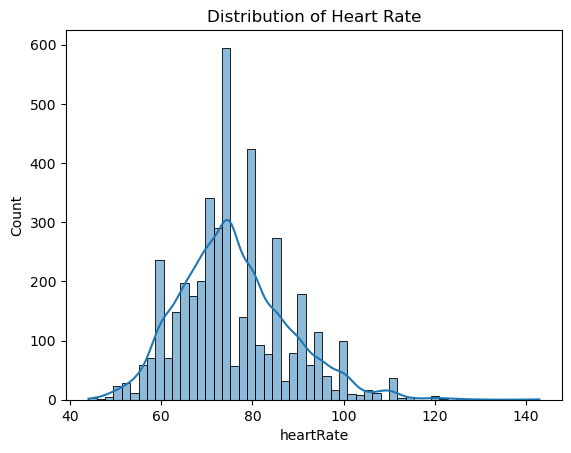

In [6]:
# 5. Stats & visualization

# Basic Statistics and Visualization
print(df.describe())

# Heart rate distribution
sns.histplot(df['heartRate'], kde=True)
plt.title("Distribution of Heart Rate")
plt.show()

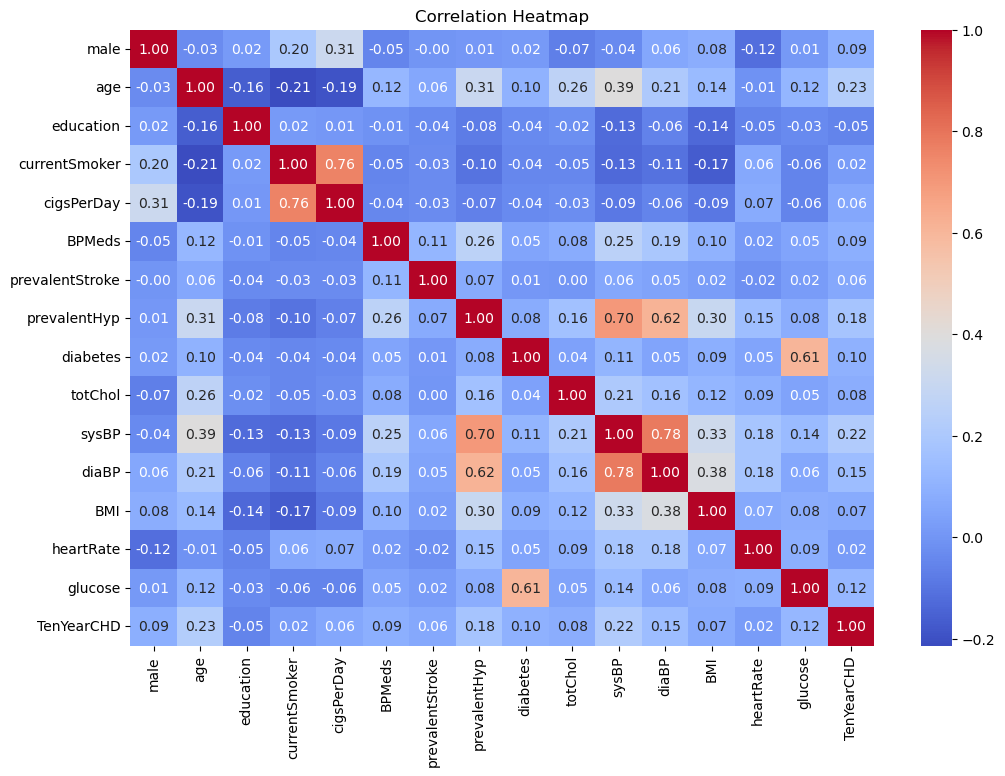

In [7]:
# 6. Correlation heatmap

# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# 7. Feature & target definition

#  Define Features and Target
df['heartRateClass'] = df['heartRate'].apply(lambda x: 1 if x >= 90 else 0)
X = df.drop(columns=['heartRate', 'heartRateClass'])
y = df['heartRateClass']


In [9]:
# 8. Train/test split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
# 9. Scaling

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# 10. Model training
# Model Training
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [12]:
# 11. Predictions
# Predictions
y_pred = model.predict(X_test_scaled)


 Accuracy Score: 0.6273584905660378
\n Classification Report:\n               precision    recall  f1-score   support

           0       0.89      0.65      0.75       725
           1       0.20      0.52      0.29       123

    accuracy                           0.63       848
   macro avg       0.54      0.58      0.52       848
weighted avg       0.79      0.63      0.68       848

 Confusion Matrix:\n [[468 257]
 [ 59  64]]


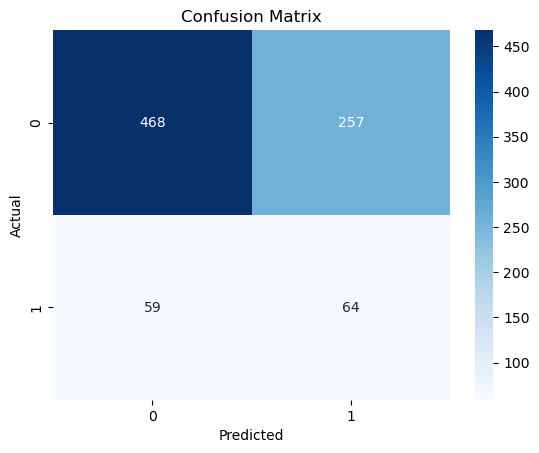

In [13]:
# 12. Evaluation

# 📈 Evaluation Metrics
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\\n Classification Report:\\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# 13. Conclusion

## Conclusion

- We used the **Framingham Heart Study** dataset to predict whether an individual has a **high heart rate (≥ 90 bpm)** based on various health-related features.
- After cleaning and exploring the data, we engineered a binary classification target and trained a **logistic regression model**.
- The model achieved a **reasonable accuracy**, and evaluation metrics (precision, recall, and F1-score) indicate that it can be useful for **early identification of elevated heart rate conditions**.
- To further improve model performance, we can:
  - Experiment with **other classifiers** like Random Forest, XGBoost, or SVM.
  - Perform **hyperparameter tuning** using GridSearchCV.
  - Apply **feature selection** and handle **class imbalance** more robustly.
- This study demonstrates the potential for using machine learning in **preventive cardiovascular health screening**.


